In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn import metrics

In [3]:
np.random.seed(16082011)

 - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [4]:
def f(x):
    return x/(x+2)**5

In [5]:
x = np.linspace(0, 10, 501)
x = np.logspace(-1, 1, base=10, num=501)
y = f(x)
e1 = np.random.randn(x.size)
e2 = np.random.randn(x.size)
yxp = y + np.abs(y)*e1/5 + e2/1e5

In [6]:
df = pd.DataFrame({'x': x, 'yth': y, 'yexp': yxp})
df.head()

,x,yth,yexp
0,0.100000,0.002449,0.002611
1,0.100925,0.002466,0.002501
2,0.101859,0.002483,0.002349
3,0.102802,0.002500,0.002921
4,0.103753,0.002518,0.002423


In [7]:
params = {
    'C': np.logspace(0, 4, num=5),
    'epsilon': np.logspace(-3, 3, num=7)
}
params

{'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
 'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [8]:
model = TransformedTargetRegressor(
    regressor=Pipeline([
        ('Scaler', StandardScaler()),
        ('Model', GridSearchCV(SVR(kernel='rbf', gamma='scale'), params))
    ]),
    transformer=StandardScaler()
)

In [9]:
model.fit(df[['x']], df['yexp'])

TransformedTargetRegressor(regressor=Pipeline(steps=[('Scaler',
                                                      StandardScaler()),
                                                     ('Model',
                                                      GridSearchCV(estimator=SVR(),
                                                                   param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                                                                               'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}))]),
                           transformer=StandardScaler())

In [10]:
model.regressor_[-1].cv_results_

{'mean_fit_time': array([1.06741428e-02, 6.25700951e-03, 3.12418938e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.10031128e-02,
        1.06664181e-02, 7.76066780e-03, 0.00000000e+00, 4.19044495e-04,
        0.00000000e+00, 0.00000000e+00, 2.90092468e-02, 2.85998821e-02,
        1.22787952e-02, 2.48003006e-03, 0.00000000e+00, 0.00000000e+00,
        1.77860260e-05, 1.48799801e-01, 1.12454081e-01, 3.88639927e-02,
        5.69124222e-03, 0.00000000e+00, 1.61647797e-05, 0.00000000e+00,
        1.35512676e+00, 9.32948112e-01, 1.74459982e-01, 8.17832947e-03,
        0.00000000e+00, 0.00000000e+00, 1.61867142e-03]),
 'std_fit_time': array([6.39872595e-03, 7.66324706e-03, 6.24837875e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.41062293e-03,
        8.27976551e-04, 3.96838248e-03, 0.00000000e+00, 8.38088989e-04,
        0.00000000e+00, 0.00000000e+00, 4.33116906e-03, 7.18351527e-03,
        3.13074129e-03, 3.93609626e-03, 0.000

In [11]:
model.regressor_[-1].get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
  'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [12]:
model.regressor_[-1].best_params_

{'C': 100.0, 'epsilon': 0.1}

In [13]:
model.regressor_[-1].best_estimator_

SVR(C=100.0)

In [14]:
model.regressor_[-1].best_estimator_.score(df[['x']], df['yexp'])

-1288166.3348898224

In [15]:
df['yhat'] = model.predict(df[['x']])

In [16]:
metrics.r2_score(df['yexp'], df['yhat'])

0.8734030589056618

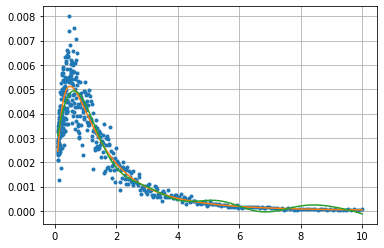

In [17]:
fig, axe = plt.subplots()
axe.plot(df['x'], df['yexp'], '.')
axe.plot(df['x'], df['yth'])
axe.plot(df['x'], df['yhat'])
axe.grid()